## Imports and Dataframe Attributes

In [1]:
#Import to process file
import pandas as pd
import csv
import os

#File directory
file_directory = "Raw Data/Sitting_Down_Acc/"
file_list = os.listdir(file_directory)
file_list

['Bubbles_HeadAcc_131650108253573530.csv',
 'Visual_HeadAcceleration_131658961085791050.csv',
 'Visual_HeadAcceleration_131658977720958670.csv']

In [2]:
#Read file 
file = pd.read_csv(file_directory + file_list[2], header = None, sep = ';',  names = ['timestamp','x','y','z'], parse_dates = ['timestamp'])
file.head()

,timestamp,x,y,z
0,2018-03-21 02:49:32,0.034913,-1.019042,0.057862
1,2018-03-21 02:49:32,0.034913,-1.019042,0.057862
2,2018-03-21 02:49:32,0.036133,-1.021972,0.042725
3,2018-03-21 02:49:32,0.033447,-1.023925,0.047852
4,2018-03-21 02:49:32,0.036865,-1.021240,0.045654


In [3]:
#Row x columns
file.shape

(30693, 4)

In [4]:
#Elapsed time for sample session
file['timestamp'].iloc[-1] - file['timestamp'].iloc[0]

Timedelta('0 days 00:10:14')

## Raw Data

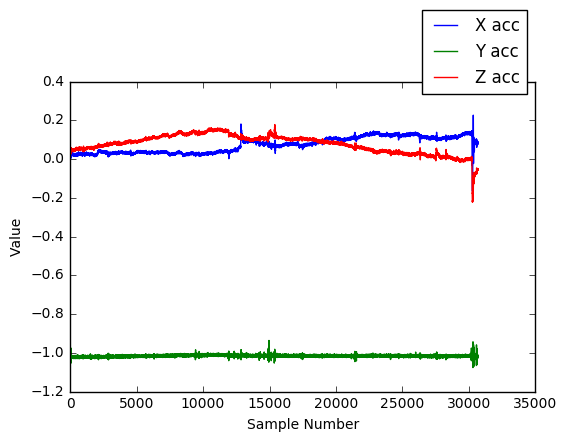

In [5]:
#Plot the raw data
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

x, = plt.plot(file['x'], label='X acc')
y, = plt.plot(file['y'], label='Y acc')
z, = plt.plot(file['z'], label='Z acc')
plt.legend(bbox_to_anchor=(0.9, 1.1), bbox_transform=plt.gcf().transFigure, handles=[x, y, z])
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

## Truncate Data

In [6]:
#Truncate last 500 samples due to noise 
#Last 10 seconds
file = file[:-500]

#Truncate first 100 samples due to noise
#First 2 seconds
file = file[100:]

In [7]:
#Time dataframe
time = file['timestamp']

#Positional datafram
position = file.drop(['timestamp'], axis = 1)

## Normalized Data

In [8]:
#Normalize data 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#Store normalized data in new variable
position = scaler.fit_transform(position)

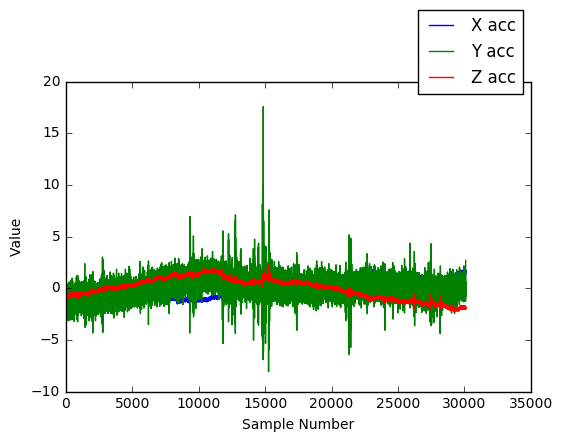

In [9]:
#Plot normalized data
x, = plt.plot(position[:,0], label='X acc')
y, = plt.plot(position[:,1], label='Y acc')
z, = plt.plot(position[:,2], label='Z acc')
plt.legend(bbox_to_anchor=(0.9, 1.1), bbox_transform=plt.gcf().transFigure, handles=[x, y, z])
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

## Rolling Mean Functions and Graphs

In [10]:
"""
This method will compute a rolling mean and apply it to the array
through subtraction
"""
def rolling_mean_sub(arr, window):
    
    mean_arr = []
    arr_len = arr.shape[0]
    n_windows = int(arr_len/window)
    
    for win in range(arr_len):
        start = win
        end = start + window
        mean_arr.append(np.mean(arr[start:end]))
        
    new_arr = arr-mean_arr
    
    return new_arr

### Note

75 BPM <br>
50 samples/second

Normal heart rate is 60 - 100 BPM which means 1 - 1.7 beats/second <br>
So - we should be able to see one beat every 50 - 85 frames 

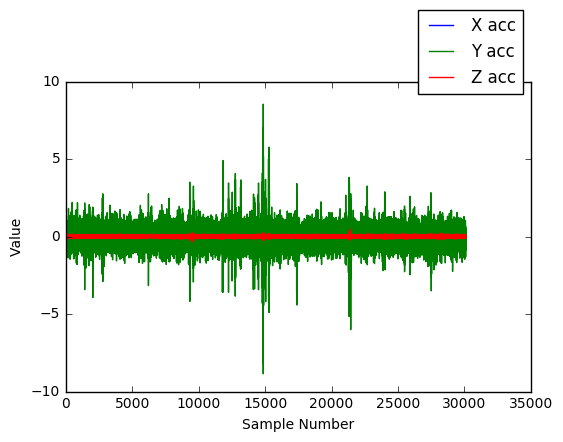

In [11]:
#Plot X position array 100 samples with window size 3
x_position = rolling_mean_sub(position[:,0], 3)

y_position = rolling_mean_sub(position[:,1], 3)

z_position = rolling_mean_sub(position[:,2], 3)


x, = plt.plot(x_position, label='X acc')
y, = plt.plot(y_position, label='Y acc')
z, = plt.plot(z_position, label='Z acc')
plt.legend(bbox_to_anchor=(0.9, 1.1), bbox_transform=plt.gcf().transFigure, handles=[x, y, z])
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

## Filters

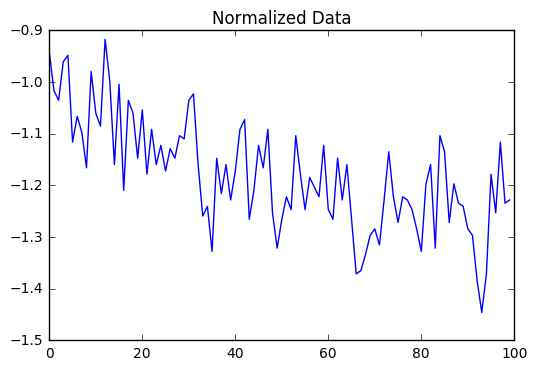

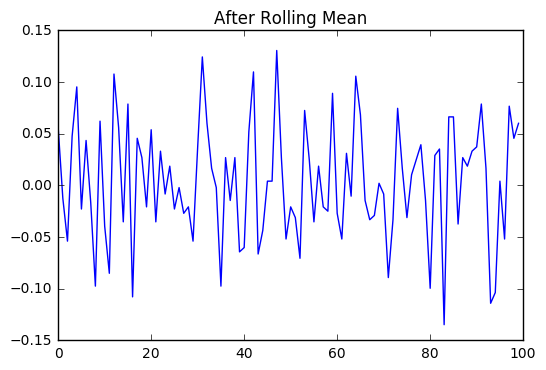

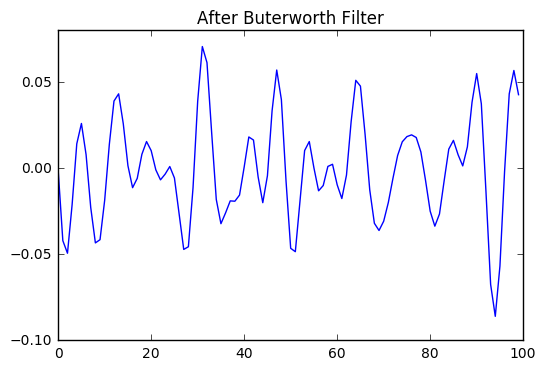

C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


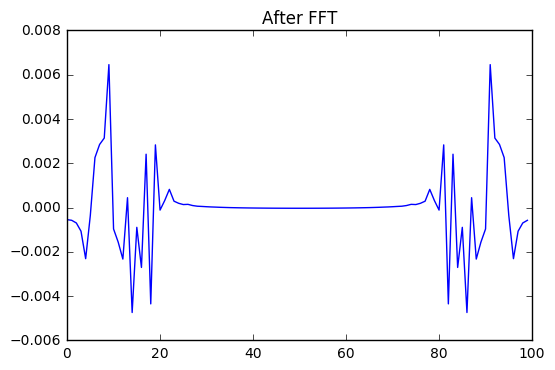

In [12]:
#Buterworth filter
from scipy import signal

fs = 50
lowcut = 2
highcut = 9

nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

#Apply to x axis data points 
x_position = rolling_mean_sub(position[:,0], 3)

# First, design the Buterworth filter
N  = 4 # Filter order
Wn = [low, high] # Cutoff frequency
B, A = signal.butter(N, Wn, btype = 'bandpass' , output='ba')
 
# Second, apply the filter
x_filter = signal.filtfilt(B,A, x_position)

#Filter
plt.plot(position[:100,0])
plt.title('Normalized Data')
plt.show()

plt.plot(x_position[:100])
plt.title('After Rolling Mean')
plt.show()

plt.plot(x_filter[:100])
plt.title('After Buterworth Filter')
plt.show()

plt.plot(np.fft.ifft(x_filter[:100]))
plt.title('After FFT')
plt.show()

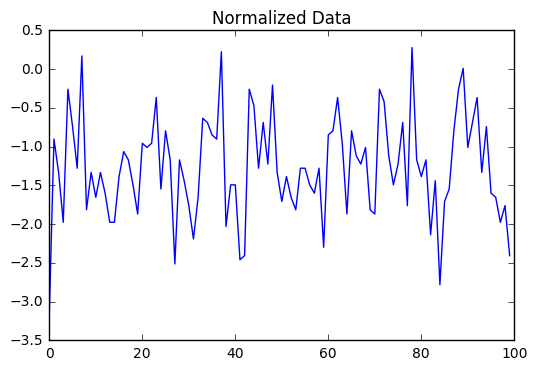

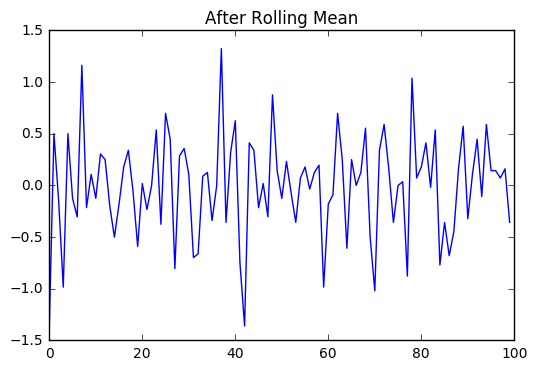

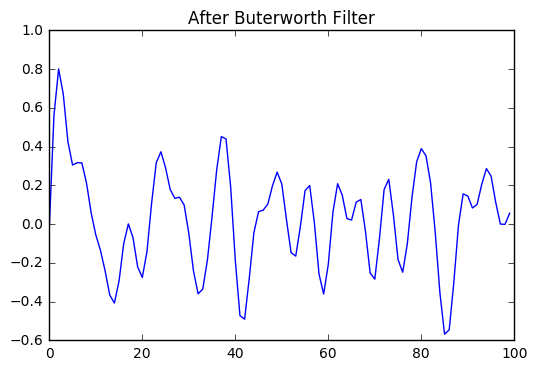

C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


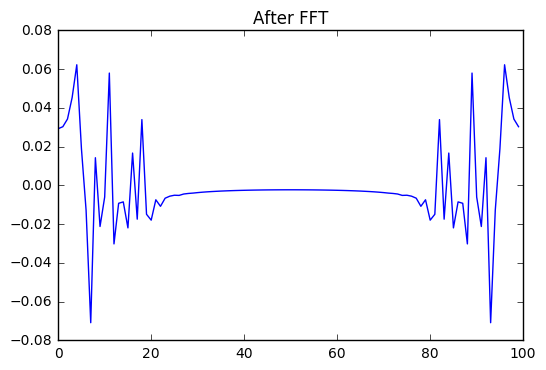

In [13]:
#Buterworth filter
from scipy import signal

fs = 50
lowcut = 2
highcut = 9

nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

#Apply to y axis data points 
y_position = rolling_mean_sub(position[:,1], 3)

# First, design the Buterworth filter
N  = 4 # Filter order
Wn = [low, high] # Cutoff frequency
B, A = signal.butter(N, Wn, btype = 'bandpass' , output='ba')
 
# Second, apply the filter
y_filter = signal.filtfilt(B,A, y_position)

#Plot 
plt.plot(position[:100,1])
plt.title('Normalized Data')
plt.show()

plt.plot(y_position[:100])
plt.title('After Rolling Mean')
plt.show()

plt.plot(y_filter[:100])
plt.title('After Buterworth Filter')
plt.show()

plt.plot(np.fft.ifft(y_filter[:100]))
plt.title('After FFT')
plt.show()

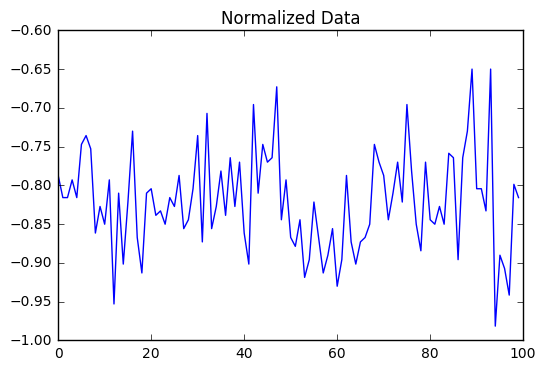

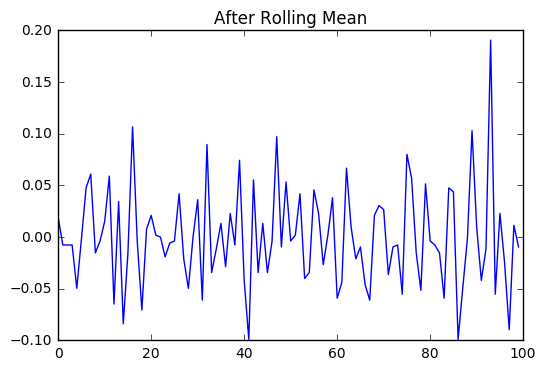

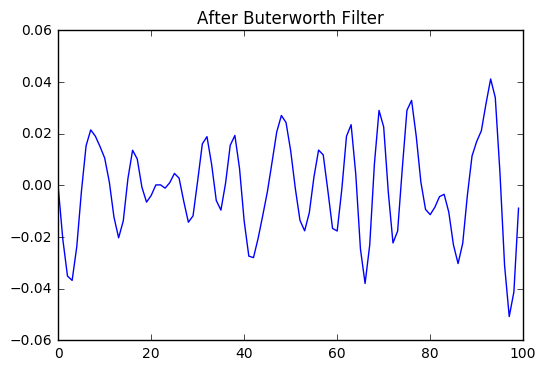

C:\Users\danil\AppData\Local\Continuum\Anaconda3\lib\site-packages\numpy\core\numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


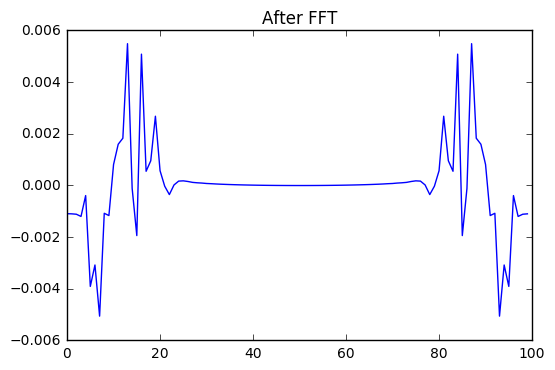

In [14]:
#Buterworth filter
from scipy import signal

fs = 50
lowcut = 2
highcut = 9

nyq = 0.5 * fs
low = lowcut / nyq
high = highcut / nyq

#Apply to z axis data points
z_position = rolling_mean_sub(position[:,2], 3)

# First, design the Buterworth filter
N  = 4 # Filter order
Wn = [low, high] # Cutoff frequency
B, A = signal.butter(N, Wn, btype = 'bandpass' , output='ba')
 
# Second, apply the filter
z_filter = signal.filtfilt(B,A, z_position)

#Plot
plt.plot(position[:100,2])
plt.title('Normalized Data')
plt.show()

plt.plot(z_position[:100])
plt.title('After Rolling Mean')
plt.show()

plt.plot(z_filter[:100])
plt.title('After Buterworth Filter')
plt.show()

plt.plot(np.fft.ifft(z_filter[:100]))
plt.title('After FFT')
plt.show()